# Module 7. Time series analysis Lab 2 

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

### Exercise 1

The file House Sales.csv contains monthly data on the number of new one-family
houses sold in the United States (in thousands) from January 1991 through December 2011.
Housing sales were steadily trending upward until about the beginning of 2006, then the
bottom fell out of the housing market, and sales eventually started trending upward again.   

- First Create a time series chart of the data.
- Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.
- Add predictions for Simple Exponential Smooting to the dataframe.
- Add predictions for Double Exponential Smoothing to the dataframe.
- Calculate the MAE to find the best model

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

C:\Users\liamr\AppData\Local\Temp\ipykernel_23728\2792024889.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Houses Sold
Month,
jan/91,401
feb/91,482
mrt/91,507
apr/91,508
mei/91,517


First Create a time series chart of the data.

<Axes: xlabel='Month'>

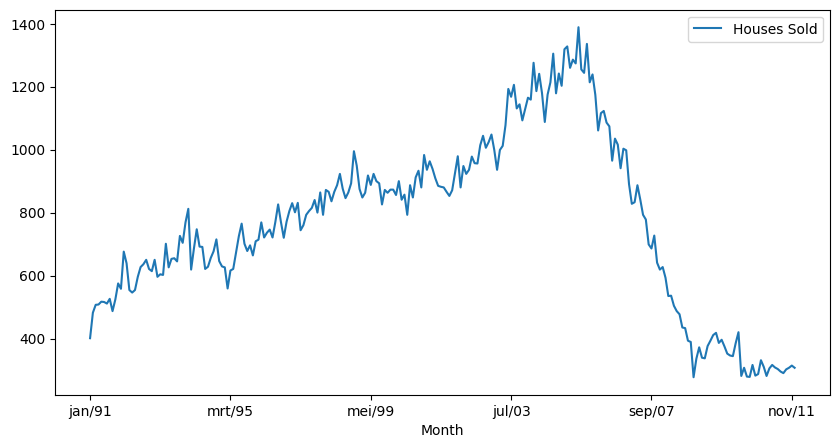

In [3]:
data.plot( y='Houses Sold', figsize=[10,5])

Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.

In [6]:
#Shift(1) as these are the predictions, we are not simple calculating the moving average

data['SMA3'] = data['Houses Sold'].rolling(3).mean().shift(1)
data['SMA6'] = data['Houses Sold'].rolling(6).mean().shift(1)
data['SMA12'] = data['Houses Sold'].rolling(12).mean().shift(1)
data.head()

,Houses Sold,SMA3,SMA6,SMA12
Month,,,,
jan/91,401,NaN,NaN,NaN
feb/91,482,NaN,NaN,NaN
mrt/91,507,NaN,NaN,NaN
apr/91,508,463.333333,NaN,NaN
mei/91,517,499.000000,NaN,NaN


Add predictions for Simple Exponential Smooting to the dataframe.

C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)

<Axes: xlabel='Month'>

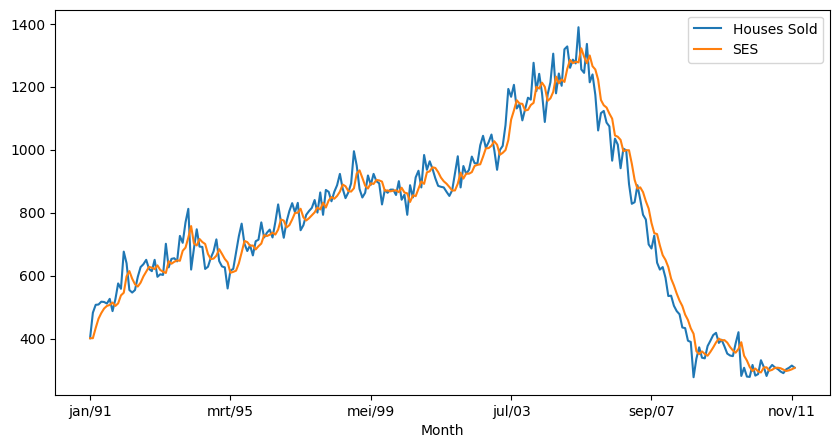

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
data_ses = SimpleExpSmoothing(data['Houses Sold']).fit(smoothing_level=0.4, optimized=True)
data['SES'] = data_ses.fittedvalues
data.plot(y=['Houses Sold',  'SES'], figsize=[10,5])

Add predictions for Double Exponential Smoothing to the dataframe.

In [15]:
#Note, not really predictions, but fitted values (exercise titled wrong)
from statsmodels.tsa.api import Holt

data_des = Holt(data['Houses Sold']).fit(smoothing_level=.1, smoothing_trend=.2)
data['DES'] = data_des.fittedvalues

data.head()

C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)

,Houses Sold,SMA3,SMA6,SMA12,EMA_0.1,EMA_0.5,SES,DES
Month,,,,,,,,
jan/91,401,NaN,NaN,NaN,401.0000,401.0000,401.000,482.000000
feb/91,482,NaN,NaN,NaN,409.1000,441.5000,401.000,553.280000
mrt/91,507,NaN,NaN,NaN,418.8900,474.2500,433.400,624.106400
apr/91,508,463.333333,NaN,NaN,427.8010,491.1250,462.840,688.008032
mei/91,517,499.000000,NaN,NaN,436.7209,504.0625,480.904,742.019340


Calculate the MAE to find the best model. First drop the rows with NaN.

<Axes: xlabel='Month'>

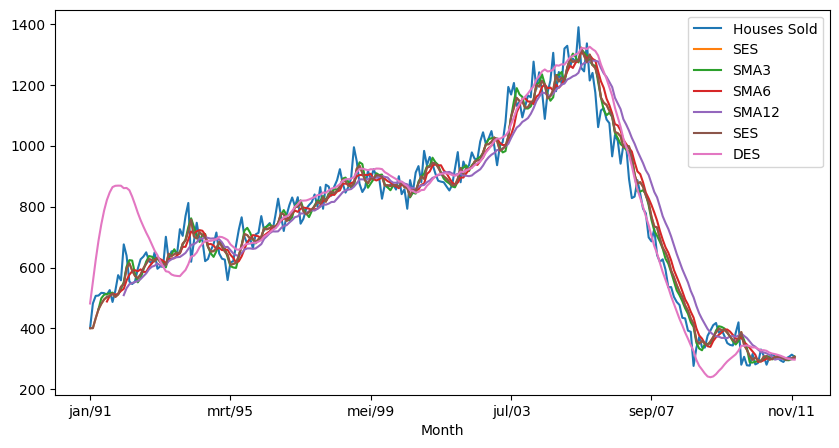

In [16]:
data.plot(y=['Houses Sold',  'SES','SMA3','SMA6','SMA12','SES','DES'], figsize=[10,5])

In [ ]:
columns = ['SMA3', 'SMA6', 'SMA12', 'SES', 'DES']

## Exercise 2

You have been assigned to forecast the number of aircraft engines ordered each month from an engine manufacturing company. At the end of February, the
forecast is that 100 engines will be ordered during April.
Then during March, 120 engines are actually ordered.  
Using $\alpha$ = 0.3, determine a forecast (at the end of March) for the number of orders placed during April and during May. Use simple exponential
smoothing.  
These are the appropriate formulae

$X_t = \alpha x_t + (1 - \alpha) X_{t-1}$

$F_{t+m} = X_t$

alpha = 0.3

x_t = 120 (last observed value)

X_T_minusOne = 100 <-- Second formula X_T_minusOne = forecast_April

X_T = alpha * x_t  + (1 - alpha) * X_T_minusOne => 106.0

## Exercise 3

An automobile dealer is using Holt's method to
forecast weekly car sales. Currently, the level is
estimated to be 50 cars per week, and the trend is
estimated to be six cars per week. During the current
week, 30 cars are sold. After observing the current
week's sales, forecast the number of cars three weeks
from now. Use $α = $β = 0.3.

These are the appropriate formulae

$X_{t} = \alpha x_{t} + (1-\alpha)(X_{t-1} + b_{t-1})$

$b_{t} = \beta(X_{t}-X_{t-1}) + (1-\beta)b_{t-1}$

$F_{t+m} = X_t + mb_t$

In [17]:
'''
x_t = 30
alpha = 0.3
beta = 0.3
X_T_Min_One = 50
b_t_Min_One = 6 (trend, six cars per week)
'''
x_t = 30
alpha = 0.3
beta = 0.3
X_T_Min_One = 50
b_t_Min_One = 6 
X_t = alpha * x_t + (1 - alpha) * (X_T_Min_One + b_t_Min_One)
b_t = beta * (X_t - X_T_Min_One) + (1 - beta) * b_t_Min_One
#3 weeks from now
forecast = X_t + 3 * b_t
print(forecast)

59.17999999999999


### Exercise 4

Consider the airline ticket data in the file airline ticket data.csv  
- Create a time series chart of the data. Based on what
you see, which of the exponential smoothing models
do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

C:\Users\liamr\AppData\Local\Temp\ipykernel_23728\4084518144.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Tickets
Month,
2018-01-01,605
2018-02-01,647
2018-03-01,636
2018-04-01,612
2018-05-01,714


In [ ]:
data.plot(y=['Tickets'], figsize=[10,5])

<Axes: xlabel='Month'>

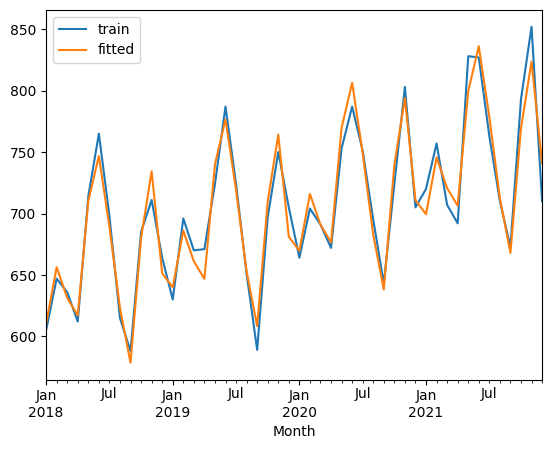

In [19]:
#We have a trend and a seasonal component (additive) -> Exponential smoothing (triple, Holtwinters model)
#If only trend -> Double exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data.Tickets

model = ExponentialSmoothing(train,
  trend='add', seasonal='add',
  seasonal_periods=12, freq='MS').fit()

Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

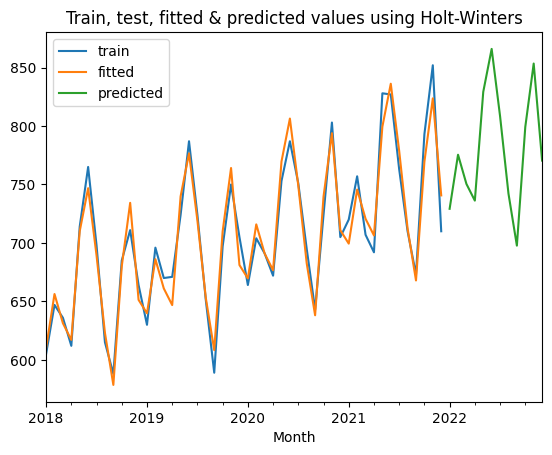

In [20]:
model_predicted = model.forecast(12)

train.plot(legend=True, label='train')
model.fittedvalues.plot(legend=True, label='fitted')


model_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')

### Exercise 5

The file US Retail.csv contains monthly retail sales of
beer, wine, and liquor at U.S. liquor stores.
- Is seasonality present in these data?
- Create a time series chart of the data. Based on what
you see, which of the exponential smoothing models
do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model. 
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [21]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

,Total Sales
Month,
1992-01-01,1519
1992-02-01,1551
1992-03-01,1606
1992-04-01,1686
1992-05-01,1834


Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

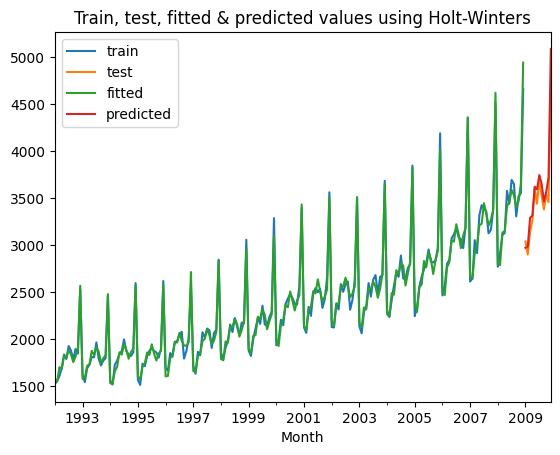

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Everything but the last twelve values
train = data['Total Sales'][:-12]
#Only the last twelve values
test = data['Total Sales'][-12:]

model = ExponentialSmoothing(train,
  trend='add', seasonal='multiplicative',
  seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
model.fittedvalues.plot(legend=True, label='fitted')

#Predictions
model_predicted = model.forecast(12)
model_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')


In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE = {mean_absolute_error(test,model_predicted)}')

MAE = 119.67786337481066


## Source
Business Analytics Data Analysis & Decision Making 